In [153]:
import PIL
print("Importing yolo")
from ultralytics import YOLO
print("Importing convers")
from convert import convert_to_braille_unicode, parse_xywh_and_class

Importing yolo
Importing convers


In [4]:
print("Run")
def load_model(model_path):
    """load model from path"""
    model = YOLO(model_path)
    return model

def load_image(image_path):
    """load image from path"""
    image = PIL.Image.open(image_path)
    return image


Run


In [176]:
# constants
CONF = 0.15 # or other desirable confidence threshold level
MODEL_PATH = "./yolov8_braille.pt"
IMAGE_PATH = "/Users/mqodir/Documents/GitHub/BrailleRecognition/OpenData/Photo_Turlom_C2_7.jpeg"

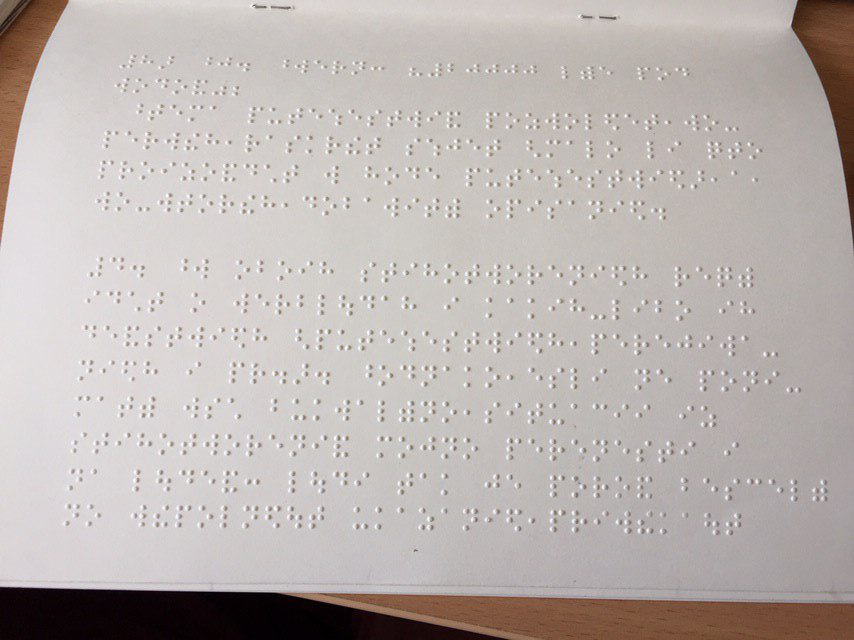

In [177]:
image = load_image(IMAGE_PATH)
model = YOLO(MODEL_PATH)
image

In [178]:
res = model.predict(image, save=True, save_txt=True, exist_ok=True, conf=CONF)
boxes = res[0].boxes
list_boxes = parse_xywh_and_class(boxes)


0: 480x640 2 000110s, 3 001000s, 3 001001s, 2 001110s, 1 001111, 7 010000s, 1 010010, 29 010100s, 4 010110s, 19 010111s, 13 011100s, 4 011101s, 22 011110s, 5 011111s, 16 100000s, 3 100001s, 25 100010s, 4 100011s, 2 100100s, 9 100110s, 6 101000s, 5 101001s, 26 101010s, 4 101011s, 3 101100s, 14 101110s, 5 110000s, 1 110001, 11 110010s, 4 110011s, 7 110101s, 10 111000s, 12 111010s, 13 111100s, 4 111101s, 1 111110, 1503.5ms
Speed: 5.1ms preprocess, 1503.5ms inference, 5.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
5 labels saved to runs/detect/predict/labels


In [179]:
list_boxes

[array([[     643.32,      73.099,      13.293,      16.853,     0.81384,          60]]),
 array([[     274.59,      114.88,      14.169,      19.105,     0.83636,          41],
        [     294.43,      115.42,      14.708,       19.43,     0.80797,          30],
        [      314.4,      115.97,      14.373,      19.479,     0.78493,          34],
        [     334.42,      116.36,      14.292,      19.421,     0.79797,          35],
        [     354.11,      116.92,      14.139,      19.313,     0.79557,          34],
        [      373.9,      117.46,      14.331,      19.151,     0.79015,          28],
        [     414.03,       118.4,      14.731,      19.468,     0.86091,          23],
        [     433.85,      118.71,      14.363,      19.495,     0.81946,          20],
        [     492.04,      119.82,      14.852,      19.698,     0.88892,          60],
        [      511.3,      119.89,      14.618,      19.574,      0.8602,          42],
        [     531.38,      120

In [180]:
width, height = image.size

In [181]:
final_img = PIL.Image.new('RGBA', (width,height), "black")

In [182]:
box_class = int(list_boxes[0][2][5])
box_class

IndexError: index 2 is out of bounds for axis 0 with size 1

In [161]:
model.names[box_class]

'001000'

In [162]:
convert_to_braille_unicode(model.names[box_class])

'⠄'

In [163]:
def getAvgSpace():
    avg_space = 0
    count = 0
    for box_line in list_boxes:
        last_pos = box_line[0][0]
        for each_class in box_line:
            avg_space += each_class[0] - last_pos
            last_pos = each_class[0]
            count+=1
    return avg_space/count

In [164]:
getAvgSpace()

22.666133244832356

In [165]:
result = ""
avg_space = getAvgSpace()
matrix = []
for box_line in list_boxes:
    str_left_to_right = ""
    last_pos = box_line[0][0]
    line = []
    for each_class in box_line:
        item = []
        space = each_class[0] - last_pos
        last_pos = each_class[0]
        if space > avg_space:
            str_left_to_right += " "
        str_left_to_right += convert_to_braille_unicode(model.names[int(each_class[5])])
        item.extend(each_class)
        item.append(convert_to_braille_unicode(model.names[int(each_class[5])]))
        line.append(item)
    matrix.append(line)
    result += str_left_to_right + "\n"

In [166]:
res = {}
res["model"] = matrix
res["text"] = result
res

{'model': [[[113.88592529296875,
    75.1732177734375,
    13.941055297851562,
    18.0927734375,
    0.6627252697944641,
    15.0,
    '⠼'],
   [134.57962036132812,
    75.02130126953125,
    13.471328735351562,
    18.14588165283203,
    0.9015181064605713,
    36.0,
    '⠉'],
   [152.52000427246094,
    75.38029479980469,
    12.751983642578125,
    18.02892303466797,
    0.5830869078636169,
    8.0,
    '⠄'],
   [192.46792602539062,
    75.93142700195312,
    13.899032592773438,
    18.47247314453125,
    0.6260912418365479,
    6.0,
    '⠘'],
   [211.2234649658203,
    76.02902221679688,
    14.410858154296875,
    18.64635467529297,
    0.7835596799850464,
    60.0,
    '⠏'],
   [230.82867431640625,
    76.20999145507812,
    14.4366455078125,
    19.445030212402344,
    0.7868695259094238,
    41.0,
    '⠥'],
   [250.19058227539062,
    76.81814575195312,
    14.448074340820312,
    19.373580932617188,
    0.7898011803627014,
    30.0,
    '⠞'],
   [269.59417724609375,
    77.17

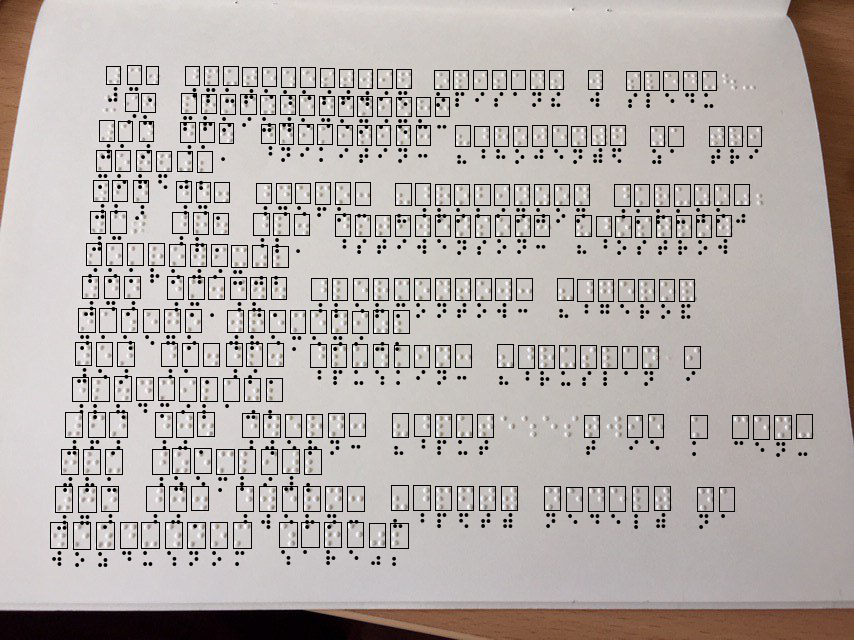

In [167]:
draw=PIL.ImageDraw.Draw(image)
for line in list_boxes:
    for ch in line:
        x0 = ch[0] - (ch[2]/2)
        y0 = ch[1] - (ch[3]/2)
        x1 = x0 + ch[2]
        y1 = y0 + ch[3]
        box_class_name = model.names[int(ch[5])]
        braille = convert_to_braille_unicode(box_class_name)
        draw.rectangle([(x0, y0), (x1, y1)],outline="black")
        font = PIL.ImageFont.truetype('braille.ttf', 20) 
        draw.text((x0, y0+ch[3]), braille, font=font, align="center", fill="#000")
image